<a href="https://colab.research.google.com/github/ask350/Test/blob/main/Time_Series_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Decomposition

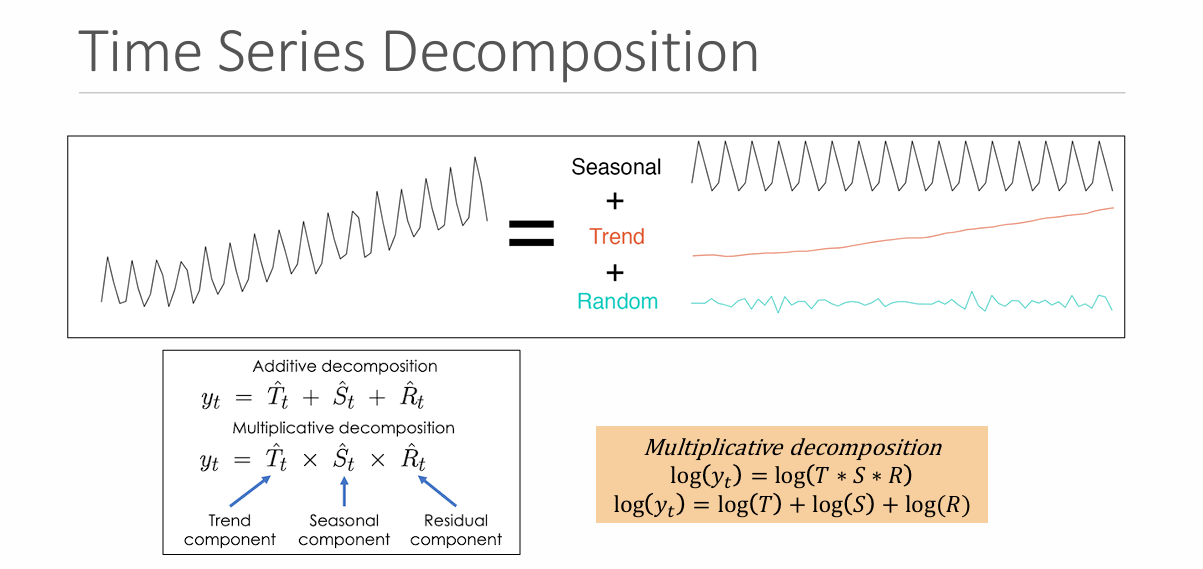

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
df = pd.read_csv(url, index_col="Month", parse_dates=True)    # if working on time series Month column should be index column and machine should recognise it as date-time
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


#### Date format in python is always yyyy-mm-dd

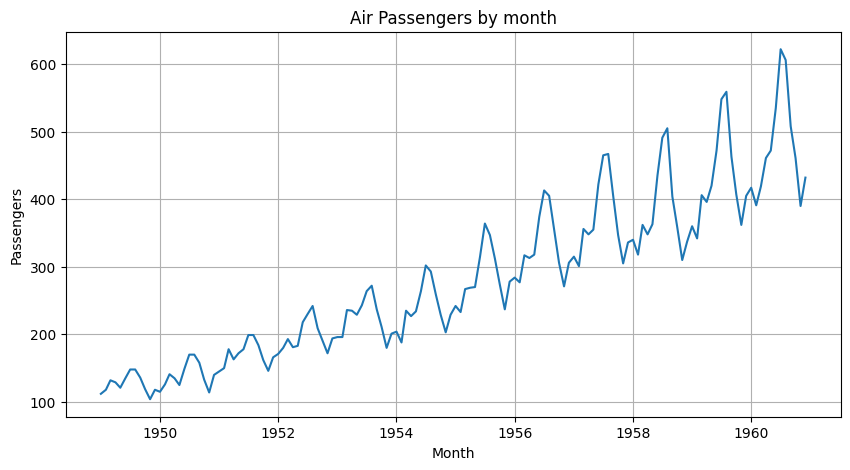

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"])
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Air Passengers by month")
plt.grid()
plt.show()

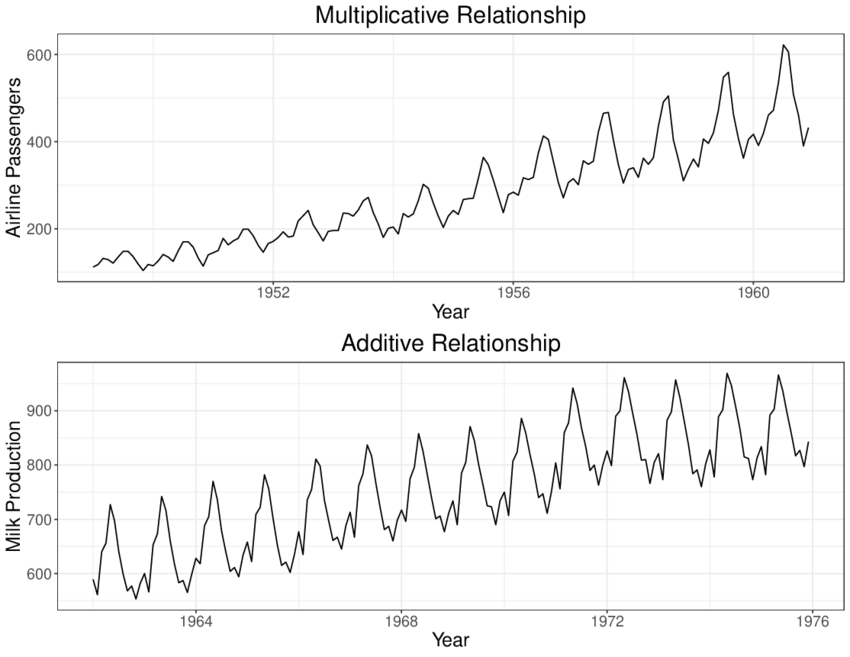

1. Additive - Trend + Season +residual
2. Multiplicative - Trend * Season * Residual

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

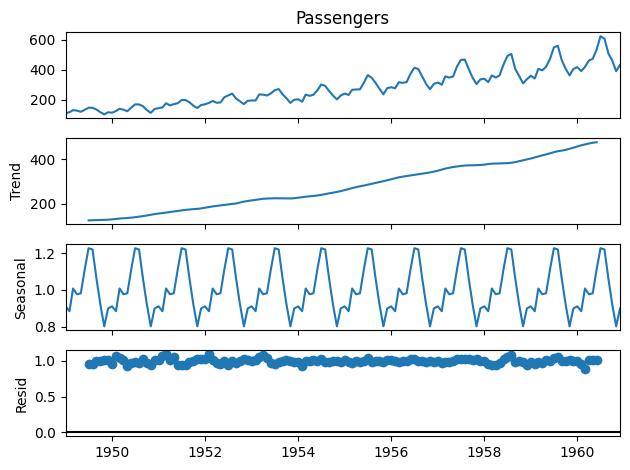

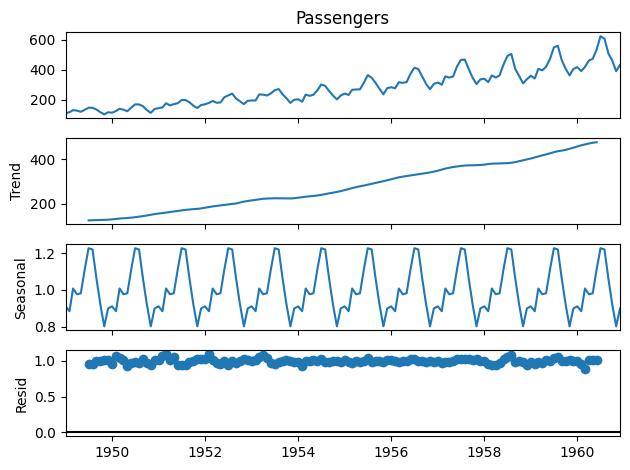

In [13]:
d = seasonal_decompose(df["Passengers"], model="multiplicative")
d.plot()                             # Shortcut way to check

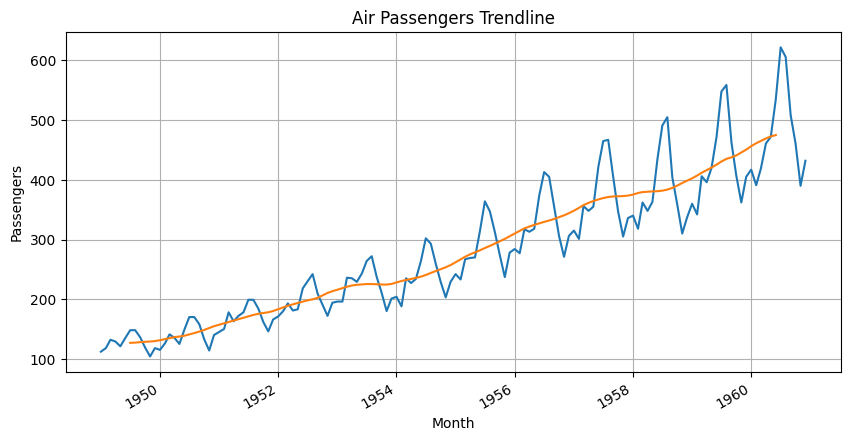

In [14]:
# Show the plot for trend
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"])
d.trend.plot()
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Air Passengers Trendline")
plt.grid()
plt.show()

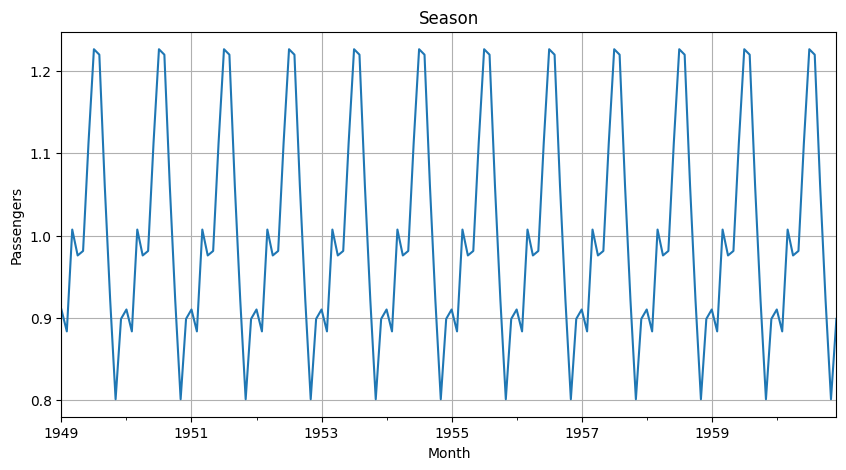

In [15]:
plt.figure(figsize=(10,5))
d.seasonal.plot()
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Season")
plt.grid()
plt.show()

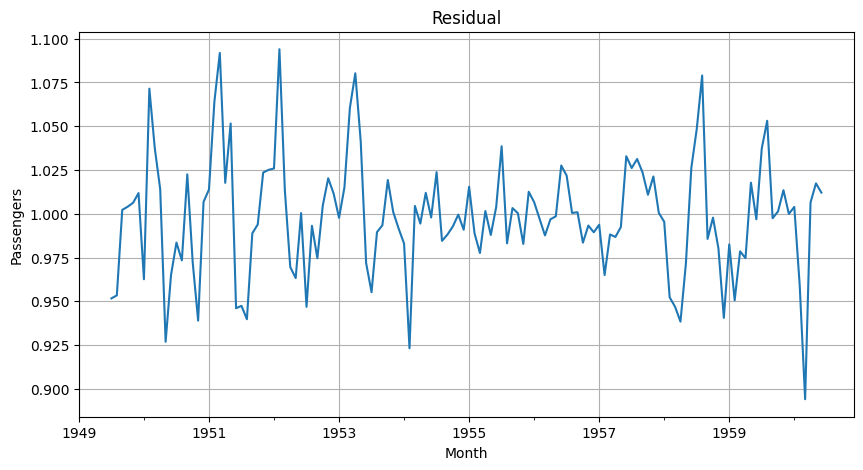

In [16]:
plt.figure(figsize=(10,5))
d.resid.plot()
plt.xlabel("Month")
plt.ylabel("Passengers")  # Randomness
plt.title("Residual")
plt.grid()
plt.show()

### Time Series Decomposition complete

### Forecasting

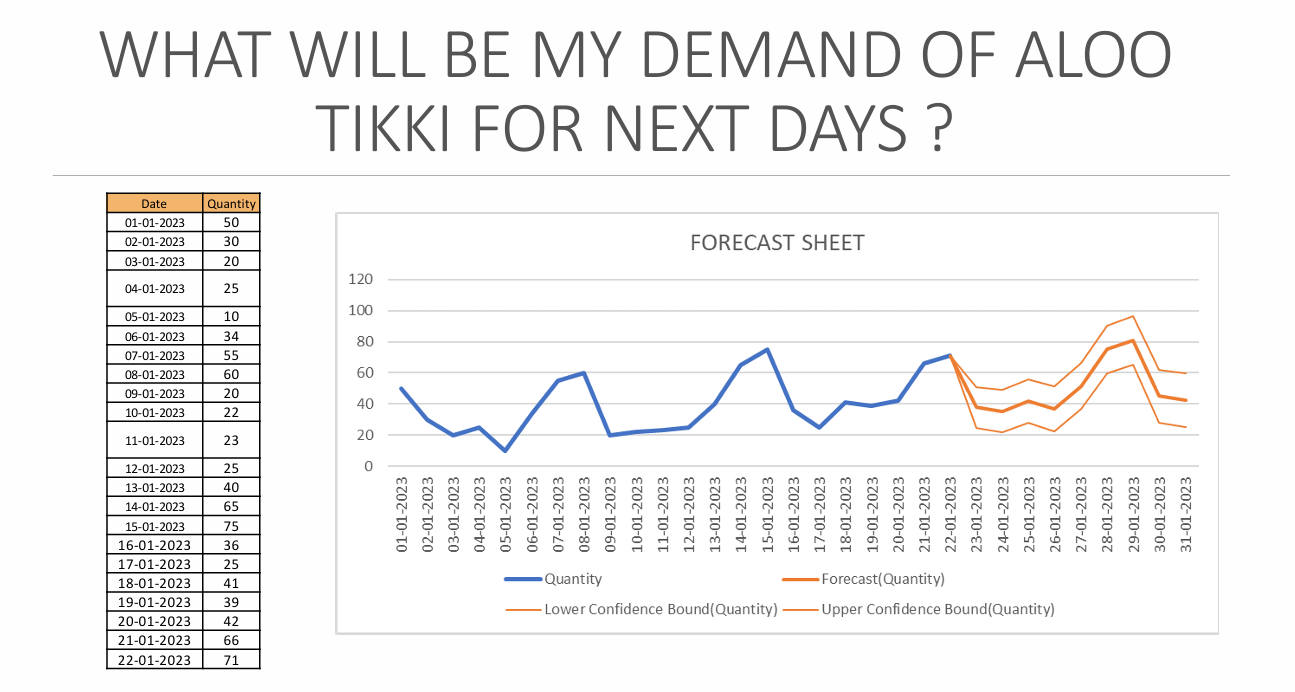

### ARIMA - Auto Regressive Integrated Moving Average
ARIMA(p,d,q)

In [17]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.8 MB/s eta 0:00:00


In [19]:
from pmdarima.arima import auto_arima

In [20]:
# Consider 1 year as season, 1year = 12 months
model = auto_arima(df["Passengers"], seasonal = True, m = 12, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=3.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.96 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.34 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.97 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.20 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.33 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.79 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.76 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.60 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(3,1,1)(0,1,0

In [21]:
model.order

(2, 1, 1)

ARIMA(2,1,1)   -   2,1,1 = p,d,q values

### Forecast values for next 4 years->12*4 = 48 months

In [22]:
forecast, conf = model.predict(n_periods = 48, return_conf_int = True)
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [23]:
conf

array([[423.34484757, 467.92501952],
       [394.23539679, 446.55465213],
       [419.83171141, 478.56498452],
       [460.37625926, 523.30369276],
       [470.38045292, 536.40855182],
       [532.69931939, 601.02562216],
       [619.22112948, 689.29924892],
       [602.87983183, 674.31515457],
       [504.63120707, 577.13627077],
       [457.44583825, 530.80738157],
       [386.30372821, 460.36165208],
       [428.1911891 , 502.82391072],
       [433.49735818, 525.08434836],
       [405.10869698, 503.24497681],
       [431.1554372 , 535.01852521],
       [471.84033434, 579.79816045],
       [481.87334967, 593.02801195],
       [544.15634767, 657.81146303],
       [630.60850683, 746.26548123],
       [614.17889589, 731.46366422],
       [515.83210925, 634.46267142],
       [468.54379213, 588.30438119],
       [397.29693225, 518.02080357],
       [439.07958457, 560.63657678],
       [446.3268565 , 580.99723894],
       [418.31792814, 558.81320108],
       [444.62395763, 590.35721439],
 

In [39]:
df_fo = pd.DataFrame(forecast, columns = ["forecast"])
df_fo.head()

,forecast
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502


In [40]:
df_fo[["Low", "High"]] = conf

In [31]:
df_forecast = df_forecast.round(0)
df_forecast.head()

,forecast,Low,High
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0


In [41]:
df_fo.to_csv("Forecast.csv", index_label="Month")

### Visualising the forecast

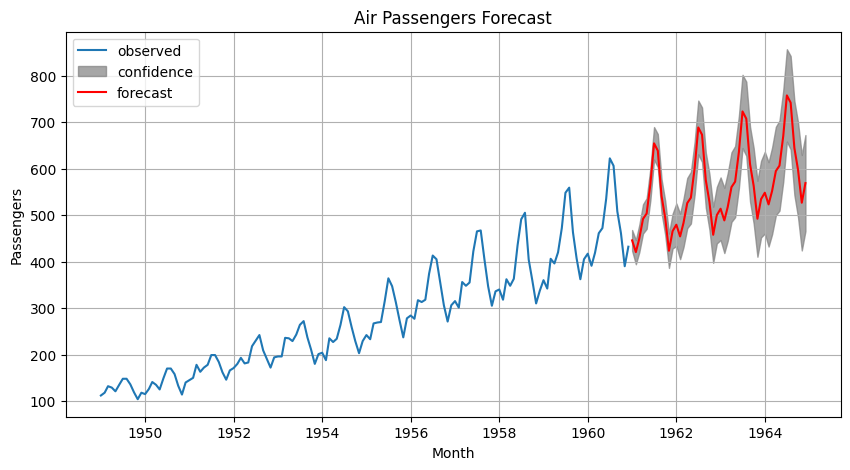

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df["Passengers"], label="observed")
plt.fill_between(df_fo.index, df_fo["Low"], df_fo["High"], color="gray", alpha=0.7, label="confidence")
plt.plot(df_fo["forecast"], color="red", label="forecast")
plt.xlabel("Month")
plt.ylabel("Passengers")
plt.title("Air Passengers Forecast")
plt.legend()
plt.grid()
plt.show()